# Importer les packages Numpy et Matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Génération d’un dataset (x, y) linéaire

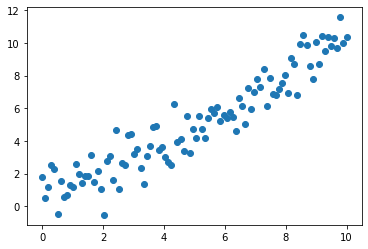

In [2]:
np.random.seed(0) # pour toujours reproduire le meme dataset
 
n_samples = 100 # nombre d'echantillons a générer
x = np.linspace(0, 10, n_samples).reshape((n_samples, 1))
y = x + np.random.randn(n_samples, 1)
 
 
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée
plt.show()

In [3]:
# ajout de la colonne de biais a X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
 
# création d'un vecteur parametre theta
theta = np.random.randn(2, 1)
print(theta)

(100, 2)
[[ 1.8831507 ]
 [-1.34775906]]


# Développement des fonctions de Descente de gradient:

In [4]:
def model(X, theta):
    return X.dot(theta)
 
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
 
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
 
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
         
    return theta, cost_history

# Example de test

In [5]:
print(cost_function(X, y, theta))

8.571212944952592


# Entrainement du modèle

[[ 1.16453556]
 [-1.08354775]]


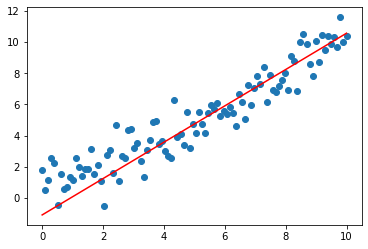

In [7]:
n_iterations = 1000
learning_rate = 0.001
 
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
 
print(theta_final) # voici les parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
 
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()

# Les courbes d’apprentissage

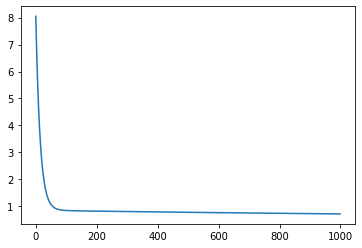

In [8]:
plt.plot(range(n_iterations), cost_history)
plt.show()

courbe d’apprentissage (Learning curves) les courbes qui montrent l’évolution de la Fonction Coût au fil des itérations de Gradient Descent. Si votre modèle apprend, alors sa Fonction Coût doit diminuer avec le temps